**Importing the necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

**load the data**

Dataset Description
About Dataset
**Context**
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

**Content price** price in US dollars (\$326--\$18,823)

**carat** weight of the diamond (0.2--5.01)

**cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color** diamond colour, from J (worst) to D (best)

**clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x** length in mm (0--10.74)

**y** width in mm (0--58.9)

**z** depth in mm (0--31.8)

**depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table** width of top of diamond relative to widest point (43--95)

**Files**
train.csv - the training set
test.csv - the test set
sample_submission.csv - a sample submission file in the correct format
Columns
example_id - definition of example_id
feature_1 - definition of feature_1
etc.



In [2]:
strat_test_set = pd.read_csv('/content/test.csv')
strat_train_set= pd.read_csv('/content/train.csv')
submission=pd.read_csv('sample_submission.csv')

**make a copy from traning set**

In [3]:
diamonds = strat_train_set.copy()

In [4]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


**DATA PREPROCESSING**


In [ ]:
#diamonds.drop(columns=['Unnamed: 0'], inplace=True)

**`We have three categorical variables. Let us have a look at them`**

In [ ]:
diamonds["cut"].value_counts()




Ideal        17424
Premium      11031
Very Good     9407
Good          3910
Fair          1268
Name: cut, dtype: int64

In [ ]:
diamonds["color"].value_counts()

G    8127
E    6933
F    6674
H    6075
D    4971
I    3790
J    1978
Name: color, dtype: int64

In [ ]:
diamonds["clarity"].value_counts()

SI1     10363
VS2      9981
SI2      7380
VS1      6479
VVS2     3959
VVS1     2838
IF       1483
I1        557
Name: clarity, dtype: int64

Text(0.5, 1.0, 'Diamond Cut for Price')

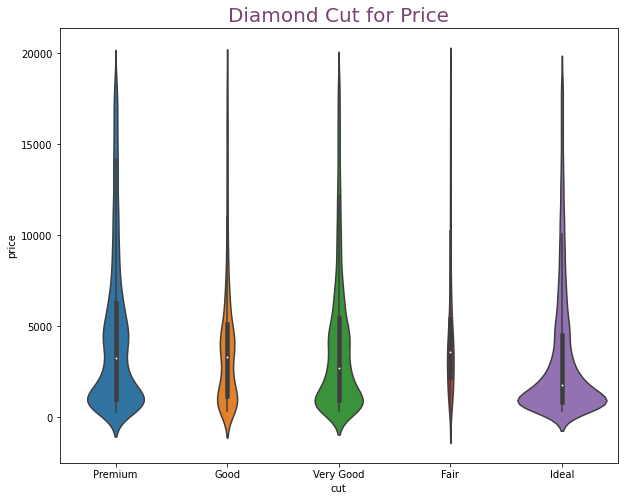

In [ ]:
plt.figure(figsize=(10,8))

ax = sns.violinplot(x="cut",y="price", data=diamonds,scale= "count")
ax.set_title("Diamond Cut for Price", color="#774571", fontsize = 20)

Text(0.5, 1.0, 'Diamond color for Price')

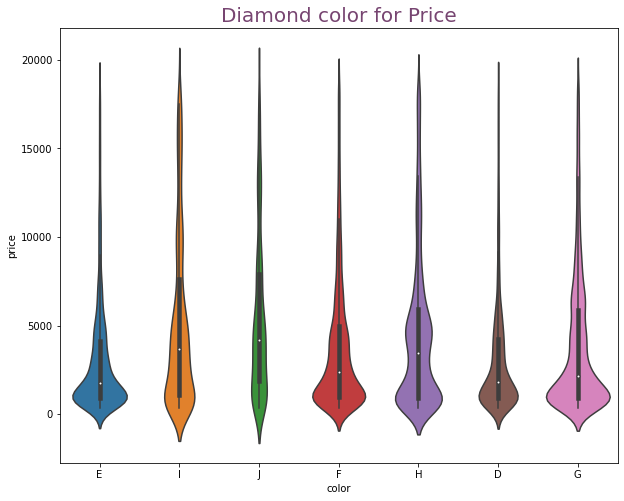

In [ ]:
plt.figure(figsize=(10,8))

ax = sns.violinplot(x="color",y="price", data=diamonds,scale= "count")
ax.set_title("Diamond color for Price", color="#774571", fontsize = 20)

Text(0.5, 1.0, 'Diamond clarity for Price')

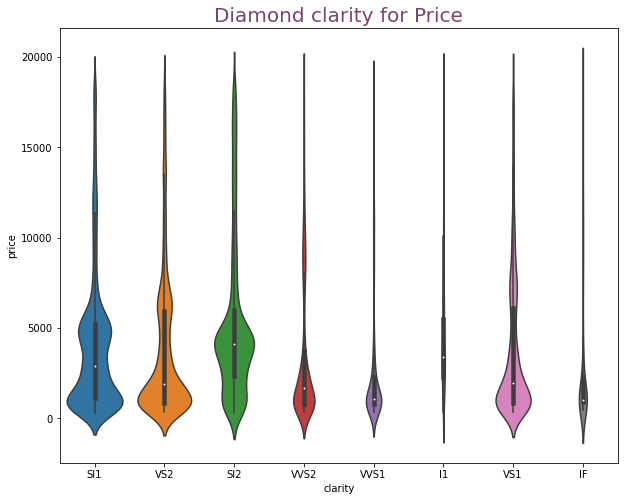

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.violinplot(x="clarity",y="price", data=diamonds,scale= "count")
ax.set_title("Diamond clarity for Price", color="#774571", fontsize = 20)

observation: 
"Ideal" diamond cuts are the most in the number while the "Fair" is the least.
 More diamonds of all of such cuts for lower price category.
"J" color diamond which is worst are most rare however, "H" and "G" are more in number eventhough they're of inferior quality as well.
Diamonds of "IF" clarity which is best as well as "I1" which is worst are very rare and rest are mostly of in-between clarities.

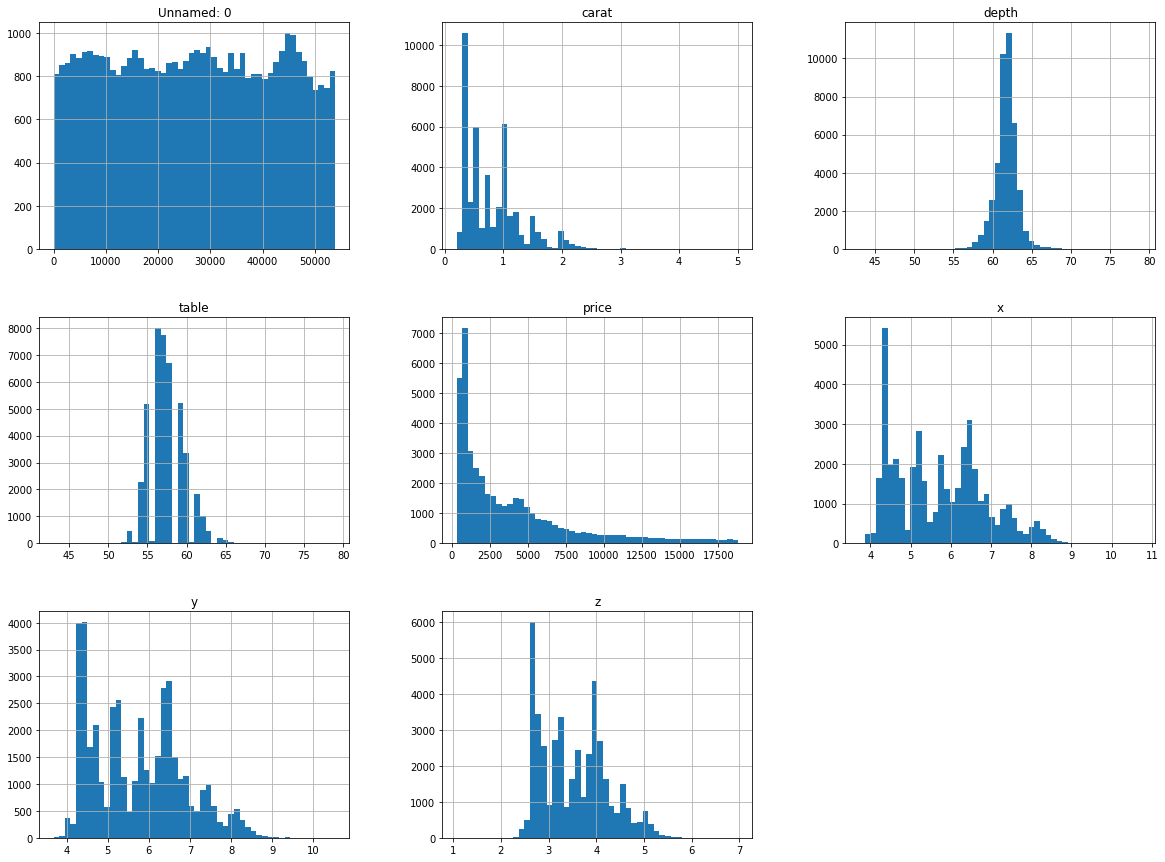

In [18]:
diamonds.hist(bins=50, figsize=(20,15));

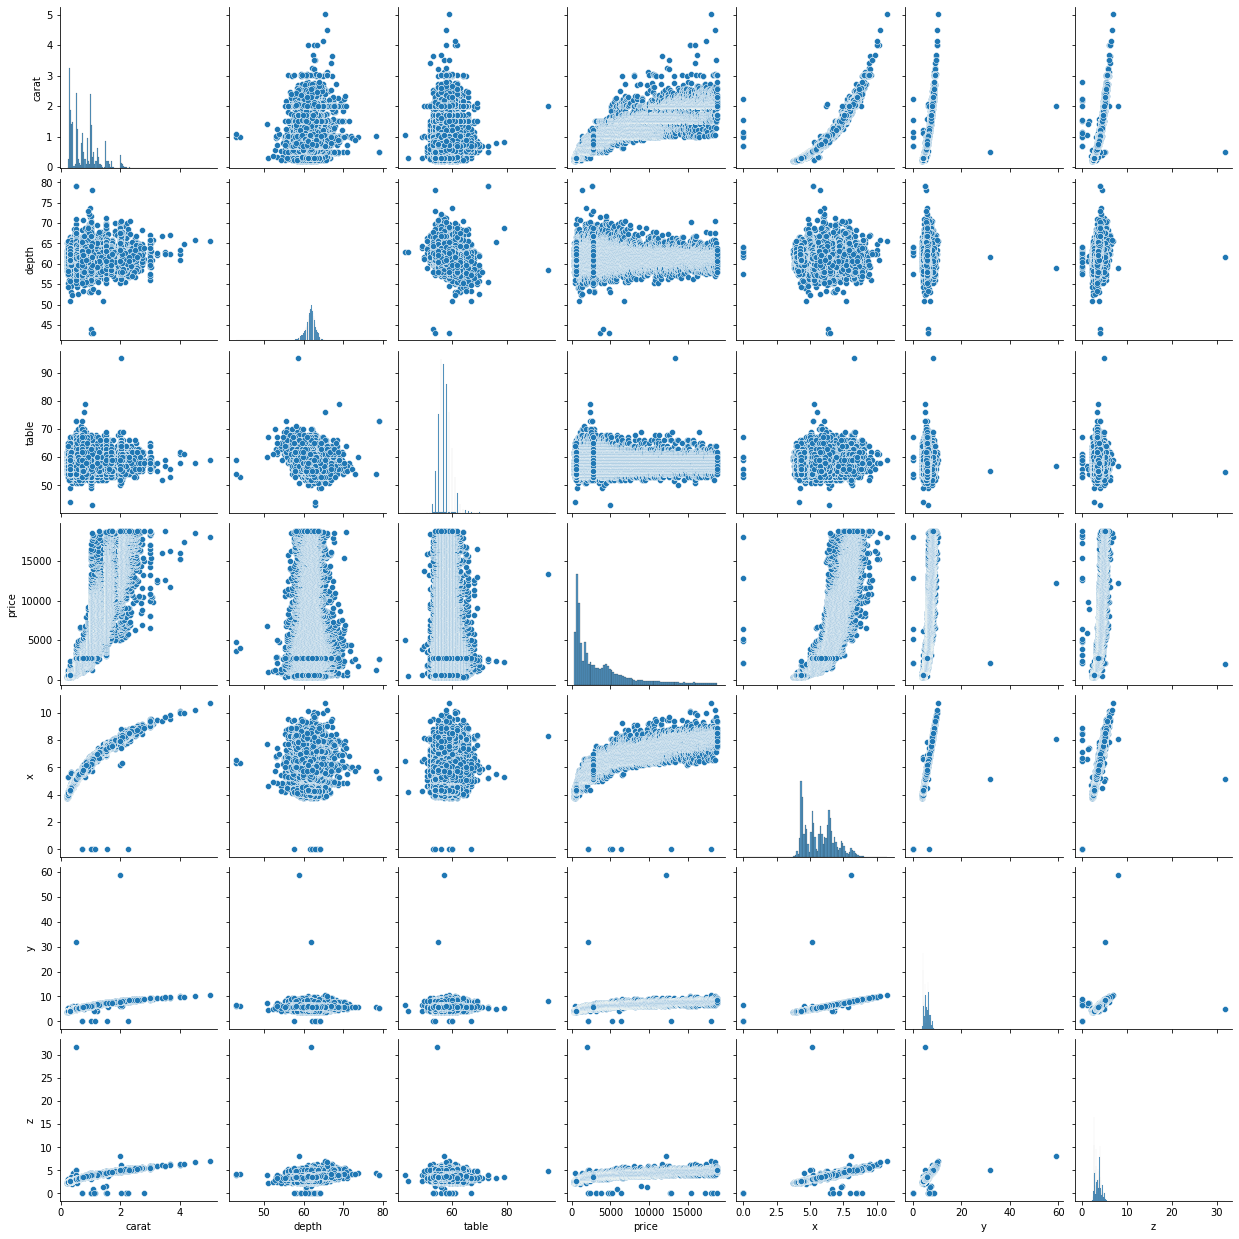

In [ ]:
import seaborn as sns
sns.pairplot(diamonds);

**"y" and "z" and "table" have some dimensional outlies in our dataset that needs to be eliminated.**

In [ ]:
corr_matrix = diamonds.corr()
corr_matrix["price"].sort_values(ascending=False)

price    1.000000
carat    0.923801
x        0.887483
y        0.863748
z        0.860625
table    0.136975
depth   -0.014393
Name: price, dtype: float64

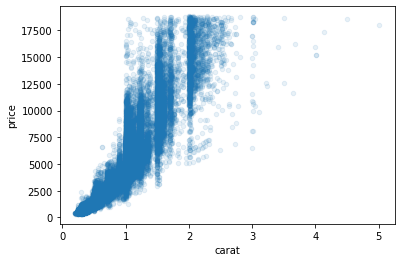

In [ ]:
diamonds.plot(kind="scatter", x="carat", y="price", alpha=0.1);

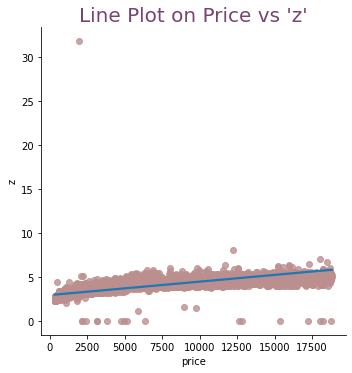

In [ ]:
lm = sns.lmplot(x="price", y="z", data=diamonds, scatter_kws={"color": "#BC8F8F"})
plt.title("Line Plot on Price vs 'z'", color="#774571", fontsize = 20)
plt.show()

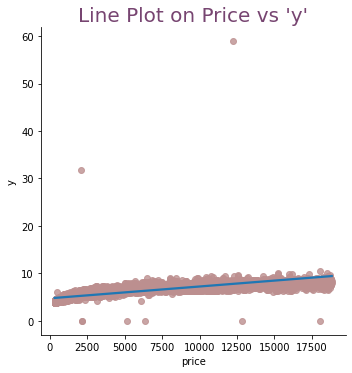

In [ ]:
lm = sns.lmplot(x="price", y="y", data=diamonds, scatter_kws={"color": "#BC8F8F"})
plt.title("Line Plot on Price vs 'y'", color="#774571", fontsize = 20)
plt.show()

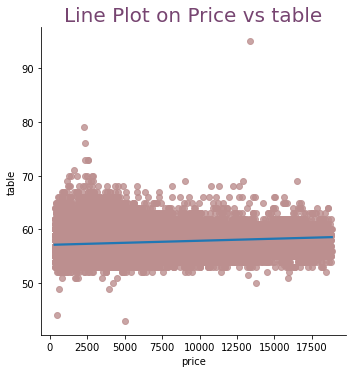

In [ ]:
lm = sns.lmplot(x="price", y="table", data=diamonds, scatter_kws={"color": "#BC8F8F"})
plt.title("Line Plot on Price vs table", color="#774571", fontsize = 20)
plt.show()

In [6]:
diamonds = diamonds.drop(diamonds[diamonds["x"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["y"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["z"]==0].index)
diamonds.shape

(43023, 11)

17 values has been deleted 

In [7]:
diamonds = diamonds[(diamonds["table"]<80)&(diamonds["table"]>40)]
diamonds = diamonds[(diamonds["y"]<20)]
diamonds = diamonds[(diamonds["z"]<15)]


check for null values


In [6]:
diamonds.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [8]:
diamonds_df = diamonds.drop("price", axis=1)
diamonds_labels = diamonds["price"].copy()

apply full pipline on our traning set 

**note** : we use ordinalencoder to transform our three categorical features to numerical 
and we use standard scaler  

In [10]:

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

diamonds_num = diamonds_df.drop(columns=["clarity","cut","color"])
num_attribs = list(diamonds_num)
cat_attribs = ["clarity","cut","color"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ])

diamonds_preaperd = full_pipeline.fit_transform(diamonds_df)

***MODEL BUILDING***




we will mesaure RMSE for three alghoritms : LinearRegression,DecisionTreeRegressor and RandomForestRegressor with cross-validation to choose the best one 

In [11]:

lin_reg = LinearRegression()
lin_reg.fit(diamonds_preaperd, diamonds_labels)
diamonds_predictions = lin_reg.predict(diamonds_preaperd)
lin_mse = mean_squared_error(diamonds_labels, diamonds_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1345.9422180524596

In [12]:

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

lin_scores = cross_val_score(lin_reg, diamonds_preaperd, diamonds_labels,
scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 984.32650647 1082.28653599 1154.71659552 1719.2501095  2940.6643135
 1975.25247997  784.31453908  717.50075835  770.61878852 1220.73169783]
Mean: 1334.9662324730148
Standard deviation: 661.151310059813


In [24]:

tree_reg = DecisionTreeRegressor()
tree_reg.fit(diamonds_preaperd, diamonds_labels)
diamonds_predictions = tree_reg.predict(diamonds_preaperd)
tree_mse = mean_squared_error(diamonds_labels, diamonds_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [25]:
scores = cross_val_score(tree_reg, diamonds_preaperd, diamonds_labels,
 scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)


Scores: [ 598.3140543   285.75020505  440.51891762  891.34356429 2060.54909863
  487.33882935   75.21388377  213.56733538  199.91607723  509.45885442]
Mean: 576.1970820042841
Standard deviation: 542.4294424470435


In [13]:

forest_reg = RandomForestRegressor()
forest_reg.fit(diamonds_preaperd, diamonds_labels)
diamonds_predictions = forest_reg.predict(diamonds_preaperd)
forest_mse = mean_squared_error(diamonds_labels, diamonds_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

27.634802148400833

In [14]:
scores = cross_val_score(forest_reg, diamonds_preaperd, diamonds_labels,
 scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [ 602.61489117  282.05822738  437.87761138  895.00003611 2061.81413906
  483.82695878   69.78226563  148.04407579  174.67875984  512.80496297]
Mean: 566.8501928111257
Standard deviation: 550.2459712898067


we find that RandomForest has less RMSE so we will use him 

In [15]:

param_grid = [
 {'n_estimators': [3, 10,30], 'max_features': [2, 4, 6,8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(diamonds_preaperd, diamonds_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [16]:
grid_search.best_params_


{'max_features': 8, 'n_estimators': 3}

In [17]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=3)

apply our model on the test set 


In [20]:
final_model = grid_search.best_estimator_
X_test_prepared = full_pipeline.transform(strat_test_set)
final_predictions = final_model.predict(X_test_prepared)
submission['price'] = final_predictions

In [21]:
submission.to_csv("late_sub.csv", index=False)

In [23]:
submission.head()

,Unnamed: 0,price
0,1,382.333333
1,3,429.333333
2,8,366.333333
3,10,387.000000
4,12,508.000000
